In [13]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [15]:
data_dir = '/content/gdrive/MyDrive/CMPE255/Final_Project/Train/'

In [16]:
img_height, img_width = 224, 224

In [17]:
batch_size = 16

In [18]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "/content/gdrive/MyDrive/CMPE255/Final_Project/Train/",
  image_size = (img_height, img_width),
  batch_size = batch_size
)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "/content/gdrive/MyDrive/CMPE255/Final_Project/Test/",
  image_size = (img_height, img_width),
  batch_size = batch_size
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "/content/gdrive/MyDrive/CMPE255/Final_Project/Val/",
  image_size = (img_height, img_width),
  batch_size = batch_size
)

Found 224 files belonging to 2 classes.
Found 40 files belonging to 2 classes.
Found 60 files belonging to 2 classes.


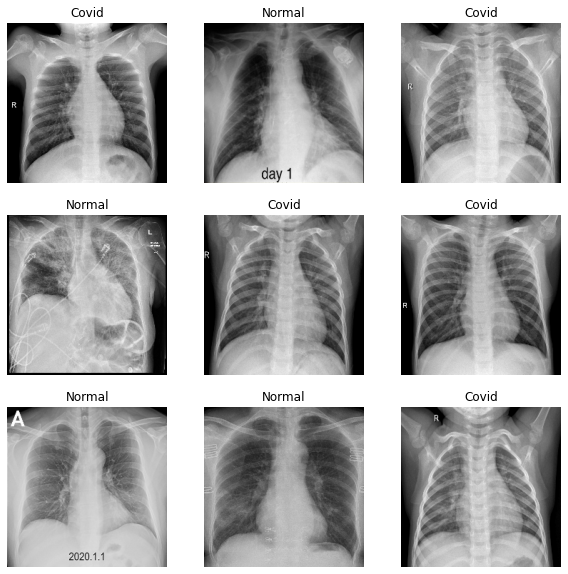

In [19]:
class_name = ["Normal", "Covid"]
plt.figure(figsize = (10, 10))
for image, label in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(class_name[label[i]])
    plt.axis("off")

In [20]:
model = tf.keras.Sequential(
    [
     #color from 1-255
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation = "relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation = "relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation = "relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation = "relu"),
     #class number
     tf.keras.layers.Dense(2)
    ]    
)

In [21]:
model.compile(
    optimizer = "adam",
    loss = tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)

In [22]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)

Epoch 1/10
14/14 [==============================] - 19s 1s/step - loss: 0.7459 - accuracy: 0.5625 - val_loss: 0.5545 - val_accuracy: 0.9333
Epoch 2/10
14/14 [==============================] - 17s 1s/step - loss: 0.3300 - accuracy: 0.9554 - val_loss: 0.1313 - val_accuracy: 0.9500
Epoch 3/10
14/14 [==============================] - 17s 1s/step - loss: 0.0829 - accuracy: 0.9732 - val_loss: 0.1356 - val_accuracy: 0.9500
Epoch 4/10
14/14 [==============================] - 18s 1s/step - loss: 0.1068 - accuracy: 0.9598 - val_loss: 0.1630 - val_accuracy: 0.9667
Epoch 5/10
14/14 [==============================] - 18s 1s/step - loss: 0.0245 - accuracy: 0.9955 - val_loss: 0.0433 - val_accuracy: 0.9833
Epoch 6/10
14/14 [==============================] - 18s 1s/step - loss: 0.0120 - accuracy: 1.0000 - val_loss: 0.0939 - val_accuracy: 0.9667
Epoch 7/10
14/14 [==============================] - 25s 2s/step - loss: 0.0127 - accuracy: 1.0000 - val_loss: 0.0315 - val_accuracy: 0.9833
Epoch 8/10
14/14 [==

In [23]:
model.evaluate(test_ds)

3/3 [==============================] - 2s 193ms/step - loss: 0.0977 - accuracy: 0.9500


[0.09772263467311859, 0.949999988079071]

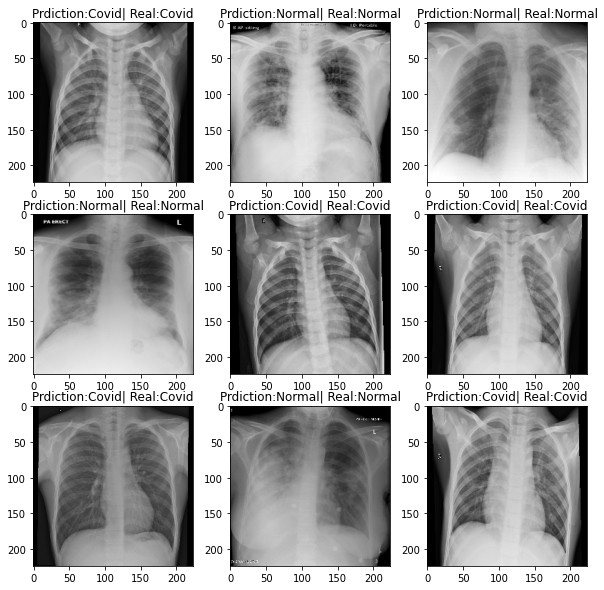

In [25]:
import numpy as np

plt.figure(figsize = (10, 10))
for image, label in test_ds.take(1):
  classification = model(image)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image[i].numpy().astype("uint8"))
    index = np.argmax(classification[i])
    plt.title("Prdiction:" + class_name[index] + "| Real:" + class_name[label[i]])

In [26]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpzqyc8ku3/assets
